# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Import your modules
from bicgstab import bicgstab
from test_problems import poisson_2d, convection_diffusion_2d
from helpers import build_ilu_preconditioner, run_scipy_solver
from comparison import compare_all_solvers
from visualization import (plot_convergence_comparison, 
                           plot_cgs_spiking_demo,
                           create_summary_table)

print("="*80)
print("BiCGSTAB Study - All modules loaded")
print("="*80)

BiCGSTAB Study - All modules loaded


# BICGSTAB VALIDATION

In [4]:
print("\n" + "█"*80)
print("BICGSTAB VALIDATION")
print("█"*80)

print("\nValidating our BiCGSTAB implementation against SciPy...")

# Test problem
nx = ny = 40
A_val = convection_diffusion_2d(nx, ny, diffusion=0.01, vel=(2.0, 1.0))
N_val = A_val.shape[0]
x_true_val = np.ones(N_val)
b_val = A_val.dot(x_true_val)
x0_val = np.zeros_like(b_val)

print(f"Problem: Conv-Diff High Péclet (40×40)")
print(f"Size: {N_val} unknowns")
print(f"Péclet number ≈ 200\n")

# Our implementation
print("Our BiCGSTAB:")
t0 = time.time()
x_ours, info_ours = bicgstab(A_val, b_val, x0=x0_val, tol=1e-8, maxiter=1000)
t_ours = time.time() - t0
err_ours = np.linalg.norm(x_ours - x_true_val)
print(f"  Iterations: {info_ours['iterations']}")
print(f"  Error: {err_ours:.3e}")
print(f"  Time: {t_ours:.3f}s")

# SciPy reference
print("\nSciPy BiCGSTAB:")
x_scipy, info_scipy, t_scipy = run_scipy_solver('bicgstab', A_val, b_val, x0_val)
err_scipy = np.linalg.norm(x_scipy - x_true_val)
print(f"  Iterations: {info_scipy['iterations']}")
print(f"  Error: {err_scipy:.3e}")
print(f"  Time: {t_scipy:.3f}s")

# Compare
print(f"\n{'='*70}")
print("VALIDATION RESULTS:")
print(f"{'='*70}")
print(f"Iteration difference: {abs(info_ours['iterations'] - info_scipy['iterations'])}")
print(f"Error difference:     {abs(err_ours - err_scipy):.3e}")

if abs(info_ours['iterations'] - info_scipy['iterations']) <= 2:
    print(f"\n✅ VALIDATION PASSED - Implementations match!")
else:
    print(f"\n⚠️  Small difference detected")

print(f"{'='*70}")


████████████████████████████████████████████████████████████████████████████████
BICGSTAB VALIDATION
████████████████████████████████████████████████████████████████████████████████

Validating our BiCGSTAB implementation against SciPy...
Problem: Conv-Diff High Péclet (40×40)
Size: 1600 unknowns
Péclet number ≈ 200

Our BiCGSTAB:
  Iterations: 74
  Error: 2.597e-07
  Time: 0.005s

SciPy BiCGSTAB:
  Iterations: 74
  Error: 2.597e-07
  Time: 0.006s

VALIDATION RESULTS:
Iteration difference: 0
Error difference:     5.679e-14

✅ VALIDATION PASSED - Implementations match!


# Test 1 - Poisson Problem (Symmetric SPD)


████████████████████████████████████████████████████████████████████████████████
CELL 9: TEST 1 - POISSON EQUATION (Symmetric SPD)
████████████████████████████████████████████████████████████████████████████████

Problem: Poisson 2D (50×50)
Size: 2500 unknowns
Preconditioning: None

Running BiCGSTAB (Our Implementation - Validated)...
  ✓ Converged: True, Iters: 70, Error: 1.296e-06, Time: 0.005s

Running BiCG (SciPy Reference)...
  ✓ Converged: True, Iters: 96, Error: 1.036e-07, Time: 0.009s

Running CGS (SciPy Reference)...
  ✓ Converged: True, Iters: 76, Error: 8.713e-09, Time: 0.007s

Running GMRES(20) (SciPy Reference)...
  ✓ Converged: True, Cycles: 22 (~440 inner iters), Error: 1.558e-05, Time: 0.067s

Running CG (SciPy Reference - Symmetric Baseline)...
  ✓ Converged: True, Iters: 96, Error: 1.036e-07, Time: 0.005s


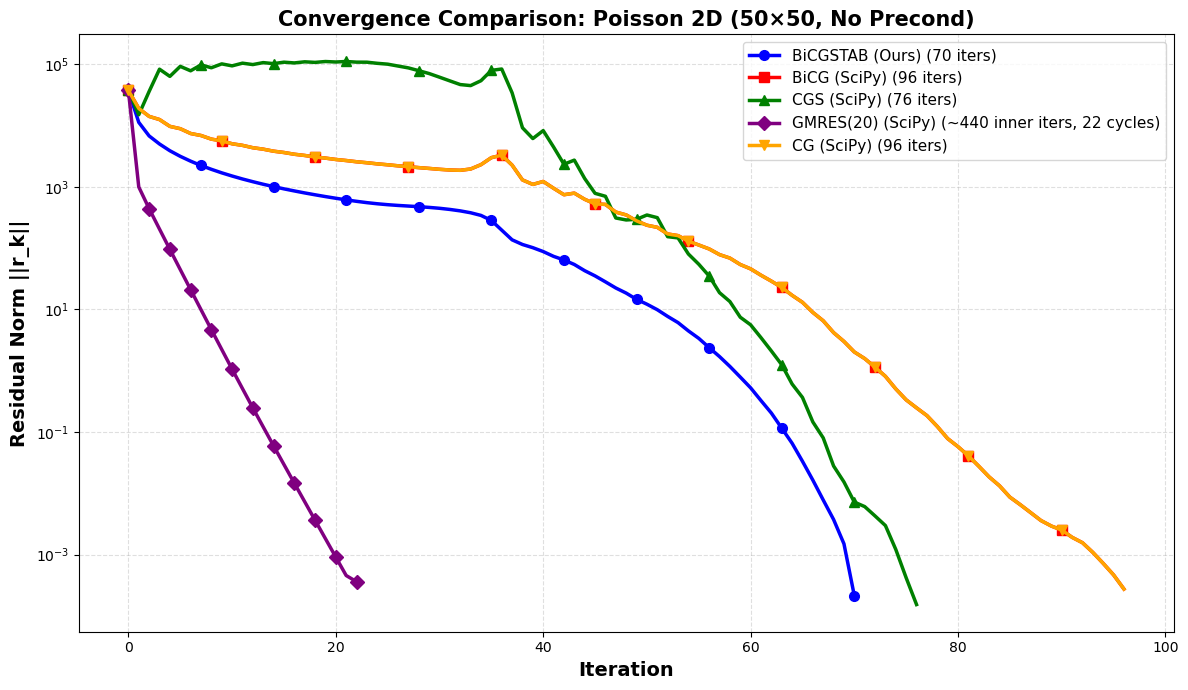

In [5]:
print("\n" + "█"*80)
print("CELL 9: TEST 1 - POISSON EQUATION (Symmetric SPD)")
print("█"*80)

nx = ny = 50
A_poisson = poisson_2d(nx, ny)
N_poisson = A_poisson.shape[0]
x_true_poisson = np.ones(N_poisson)
b_poisson = A_poisson.dot(x_true_poisson)

results_poisson = compare_all_solvers(A_poisson, b_poisson, x_true_poisson,
                                     "Poisson 2D (50×50)", use_precond=False)

plot_convergence_comparison(results_poisson, "Poisson 2D (50×50, No Precond)")

# Test 2 - Convection-Diffusion (High Péclet)


████████████████████████████████████████████████████████████████████████████████
CELL 10: TEST 2 - CONVECTION-DIFFUSION (High Péclet)
████████████████████████████████████████████████████████████████████████████████

Péclet number: 5.5

Problem: Conv-Diff High Péclet (40×40)
Size: 1600 unknowns
Preconditioning: None

Running BiCGSTAB (Our Implementation - Validated)...
  ✓ Converged: True, Iters: 74, Error: 2.597e-07, Time: 0.005s

Running BiCG (SciPy Reference)...
  ✓ Converged: True, Iters: 125, Error: 1.811e-07, Time: 0.009s

Running CGS (SciPy Reference)...
  ✓ Converged: True, Iters: 416, Error: 2.981e-08, Time: 0.029s

Running GMRES(20) (SciPy Reference)...
  ✓ Converged: True, Cycles: 14 (~280 inner iters), Error: 1.814e-07, Time: 0.040s


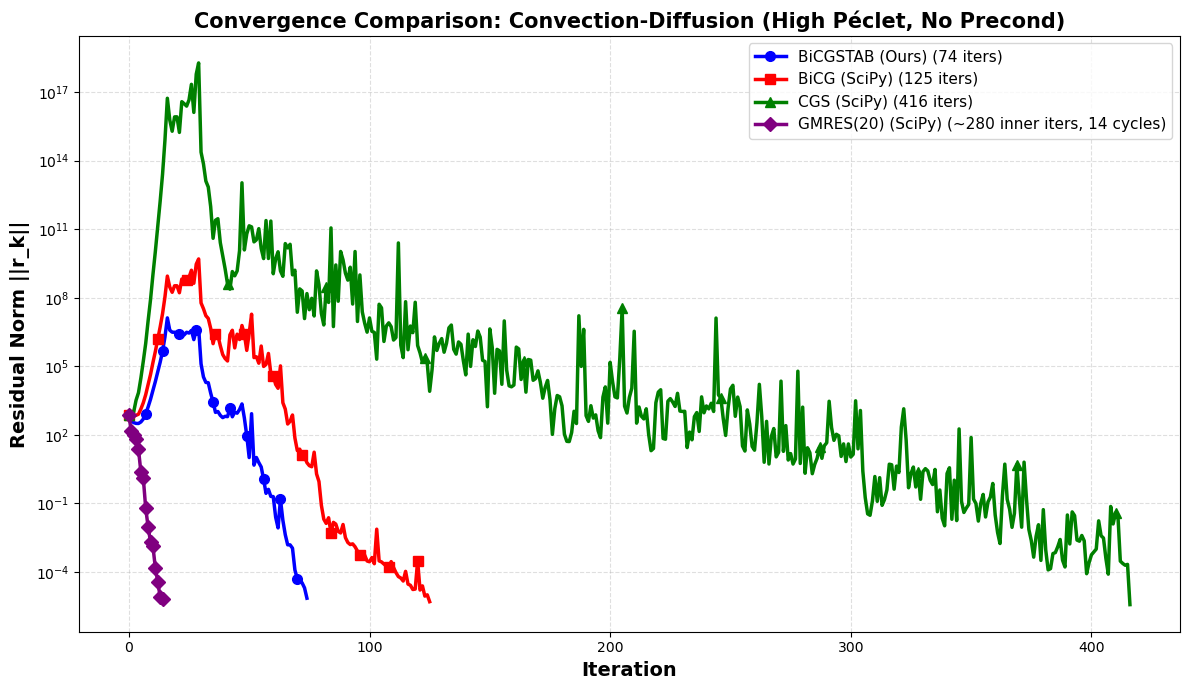

In [6]:
print("\n" + "█"*80)
print("CELL 10: TEST 2 - CONVECTION-DIFFUSION (High Péclet)")
print("█"*80)

nx = ny = 40
A_cd_high = convection_diffusion_2d(nx, ny, diffusion=0.01, vel=(2.0, 1.0))
N_cd_high = A_cd_high.shape[0]
x_true_cd_high = np.ones(N_cd_high)
b_cd_high = A_cd_high.dot(x_true_cd_high)

# Compute Péclet number
h = 1.0 / (nx + 1)
vel_mag = np.sqrt(2.0**2 + 1.0**2)
peclet = vel_mag * h / 0.01
print(f"\nPéclet number: {peclet:.1f}")

results_cd_high = compare_all_solvers(A_cd_high, b_cd_high, x_true_cd_high,
                                     "Conv-Diff High Péclet (40×40)", use_precond=False)

plot_convergence_comparison(results_cd_high, "Convection-Diffusion (High Péclet, No Precond)")

 # Test 3 - CGS Spiking Demonstration


████████████████████████████████████████████████████████████████████████████████
CELL 11: TEST 3 - CGS SPIKING vs BiCGSTAB SMOOTHNESS
████████████████████████████████████████████████████████████████████████████████


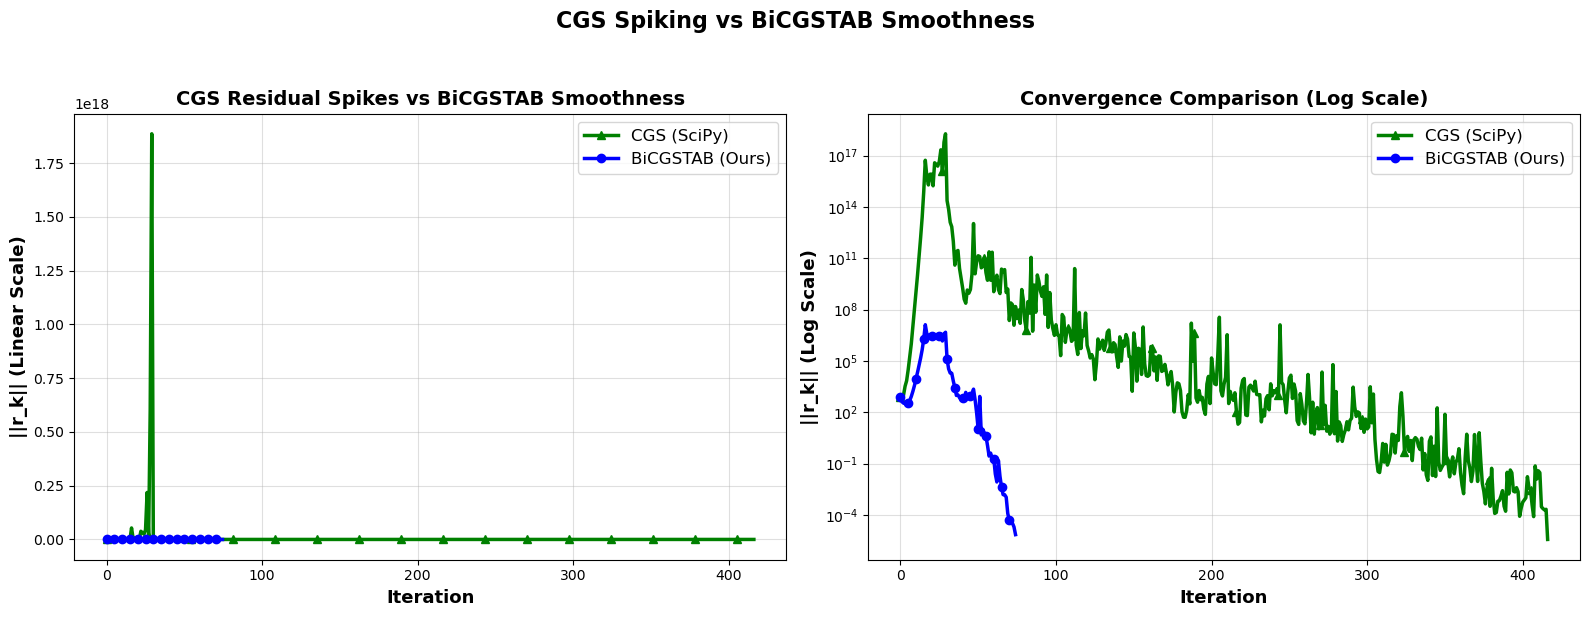


Max residual increase ratio:
  CGS (SciPy):     51,758.31×
  BiCGSTAB (Ours): 82.52×
  → BiCGSTAB is 627.3× more stable!


In [7]:
print("\n" + "█"*80)
print("CELL 11: TEST 3 - CGS SPIKING vs BiCGSTAB SMOOTHNESS")
print("█"*80)

plot_cgs_spiking_demo(results_cd_high, "CGS Spiking vs BiCGSTAB Smoothness")

# Test 4 - ILU Preconditioning Impact


████████████████████████████████████████████████████████████████████████████████
CELL 12: TEST 4 - ILU PRECONDITIONING IMPACT
████████████████████████████████████████████████████████████████████████████████

--- Without Preconditioning ---

Problem: Conv-Diff High Péclet (No Precond)
Size: 1600 unknowns
Preconditioning: None

Running BiCGSTAB (Our Implementation - Validated)...
  ✓ Converged: True, Iters: 74, Error: 2.597e-07, Time: 0.005s

Running BiCG (SciPy Reference)...
  ✓ Converged: True, Iters: 125, Error: 1.811e-07, Time: 0.009s

Running CGS (SciPy Reference)...
  ✓ Converged: True, Iters: 416, Error: 2.981e-08, Time: 0.028s

Running GMRES(20) (SciPy Reference)...
  ✓ Converged: True, Cycles: 14 (~280 inner iters), Error: 1.814e-07, Time: 0.038s

--- With ILU(0) Preconditioning ---

Problem: Conv-Diff High Péclet (ILU Precond)
Size: 1600 unknowns
Preconditioning: ILU(0)

ILU preconditioner built: 9,437 nonzeros in factors

Running BiCGSTAB (Our Implementation - Validated)...
 

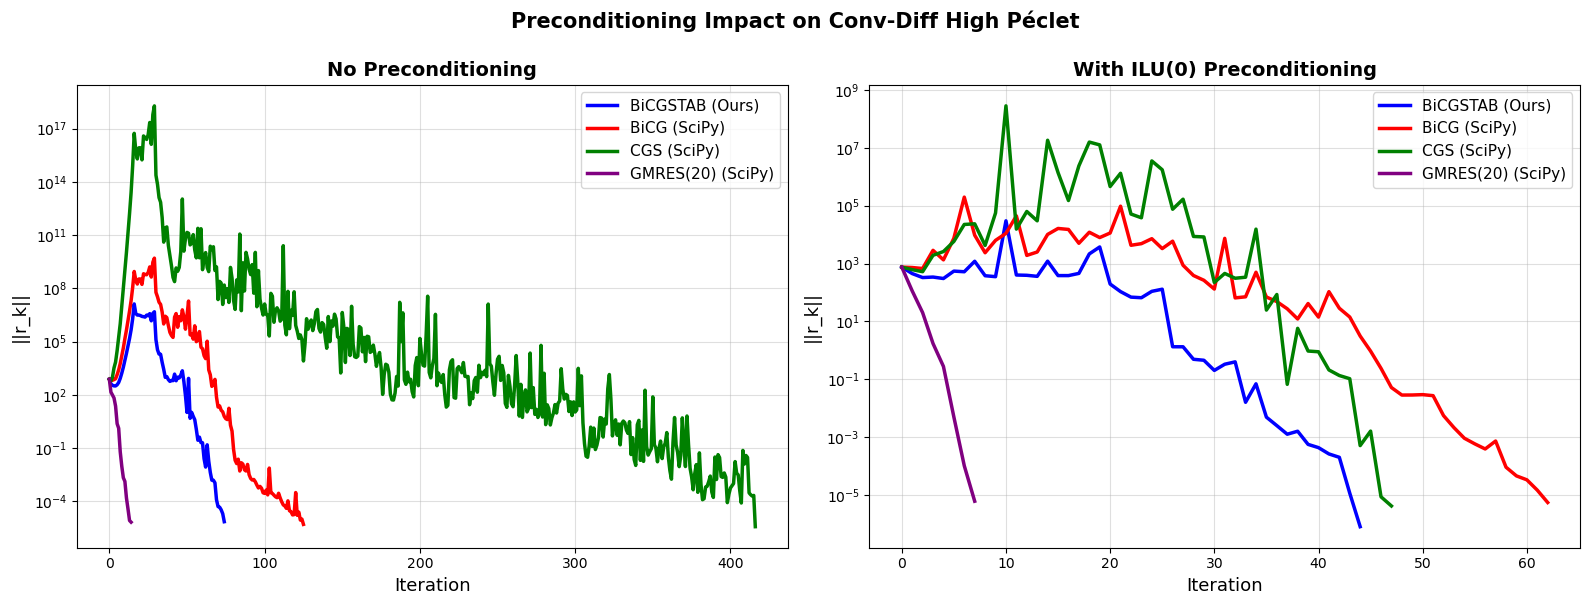


BiCGSTAB Preconditioning Impact:
  No precond: 74 iterations
  ILU precond: 44 iterations
  Speedup: 1.68×


In [8]:
print("\n" + "█"*80)
print("CELL 12: TEST 4 - ILU PRECONDITIONING IMPACT")
print("█"*80)

print("\n--- Without Preconditioning ---")
results_no_precond = compare_all_solvers(A_cd_high, b_cd_high, x_true_cd_high,
                                        "Conv-Diff High Péclet (No Precond)",
                                        use_precond=False)

print("\n--- With ILU(0) Preconditioning ---")
results_with_precond = compare_all_solvers(A_cd_high, b_cd_high, x_true_cd_high,
                                          "Conv-Diff High Péclet (ILU Precond)",
                                          use_precond=True)

# Side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = {'BiCGSTAB (Ours)': 'blue', 'BiCG (SciPy)': 'red',
          'CGS (SciPy)': 'green', 'GMRES(20) (SciPy)': 'purple'}

# Without preconditioning
for solver_name in ['BiCGSTAB (Ours)', 'BiCG (SciPy)', 'CGS (SciPy)', 'GMRES(20) (SciPy)']:
    if solver_name in results_no_precond:
        res = results_no_precond[solver_name]['info']['residuals']
        ax1.semilogy(res, label=f"{solver_name}", linewidth=2.5,
                    color=colors.get(solver_name, 'black'))

ax1.set_xlabel('Iteration', fontsize=13)
ax1.set_ylabel('||r_k||', fontsize=13)
ax1.set_title('No Preconditioning', fontweight='bold', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.4)

# With preconditioning
for solver_name in ['BiCGSTAB (Ours)', 'BiCG (SciPy)', 'CGS (SciPy)', 'GMRES(20) (SciPy)']:
    if solver_name in results_with_precond:
        res = results_with_precond[solver_name]['info']['residuals']
        ax2.semilogy(res, label=f"{solver_name}", linewidth=2.5,
                    color=colors.get(solver_name, 'black'))

ax2.set_xlabel('Iteration', fontsize=13)
ax2.set_ylabel('||r_k||', fontsize=13)
ax2.set_title('With ILU(0) Preconditioning', fontweight='bold', fontsize=14)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.4)

plt.suptitle('Preconditioning Impact on Conv-Diff High Péclet',
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Compute speedup
bicgstab_no = results_no_precond['BiCGSTAB (Ours)']['info']['iterations']
bicgstab_ilu = results_with_precond['BiCGSTAB (Ours)']['info']['iterations']
speedup = bicgstab_no / bicgstab_ilu

print(f"\nBiCGSTAB Preconditioning Impact:")
print(f"  No precond: {bicgstab_no} iterations")
print(f"  ILU precond: {bicgstab_ilu} iterations")
print(f"  Speedup: {speedup:.2f}×")

# Test 5- Preconditioner strength sweep


████████████████████████████████████████████████████████████████████████████████
PRECONDITIONER STRENGTH STUDY
████████████████████████████████████████████████████████████████████████████████

Problem: Convection-Diffusion (High Péclet)
Size: 1600 unknowns
NNZ: 7840

DROP TOLERANCE SWEEP: Convection-Diffusion (High Péclet)
Testing preconditioner strength by varying drop_tol...
Lower drop_tol → stronger preconditioner (keeps more entries)

Drop Tol     Setup(s)   Iters    Time(s)    NNZ        Error        Status    
--------------------------------------------------------------------------------
None         -          74       0.0046     -          2.597e-07    ✓         
1e-02        0.0028     34       0.0156     12072      3.914e-07    ✓         
1e-03        0.0028     35       0.0157     13145      1.044e-07    ✓         
1e-04        0.0027     35       0.0156     13541      1.063e-07    ✓         
1e-05        0.0028     36       0.0156     13831      2.678e-09    ✓         
1

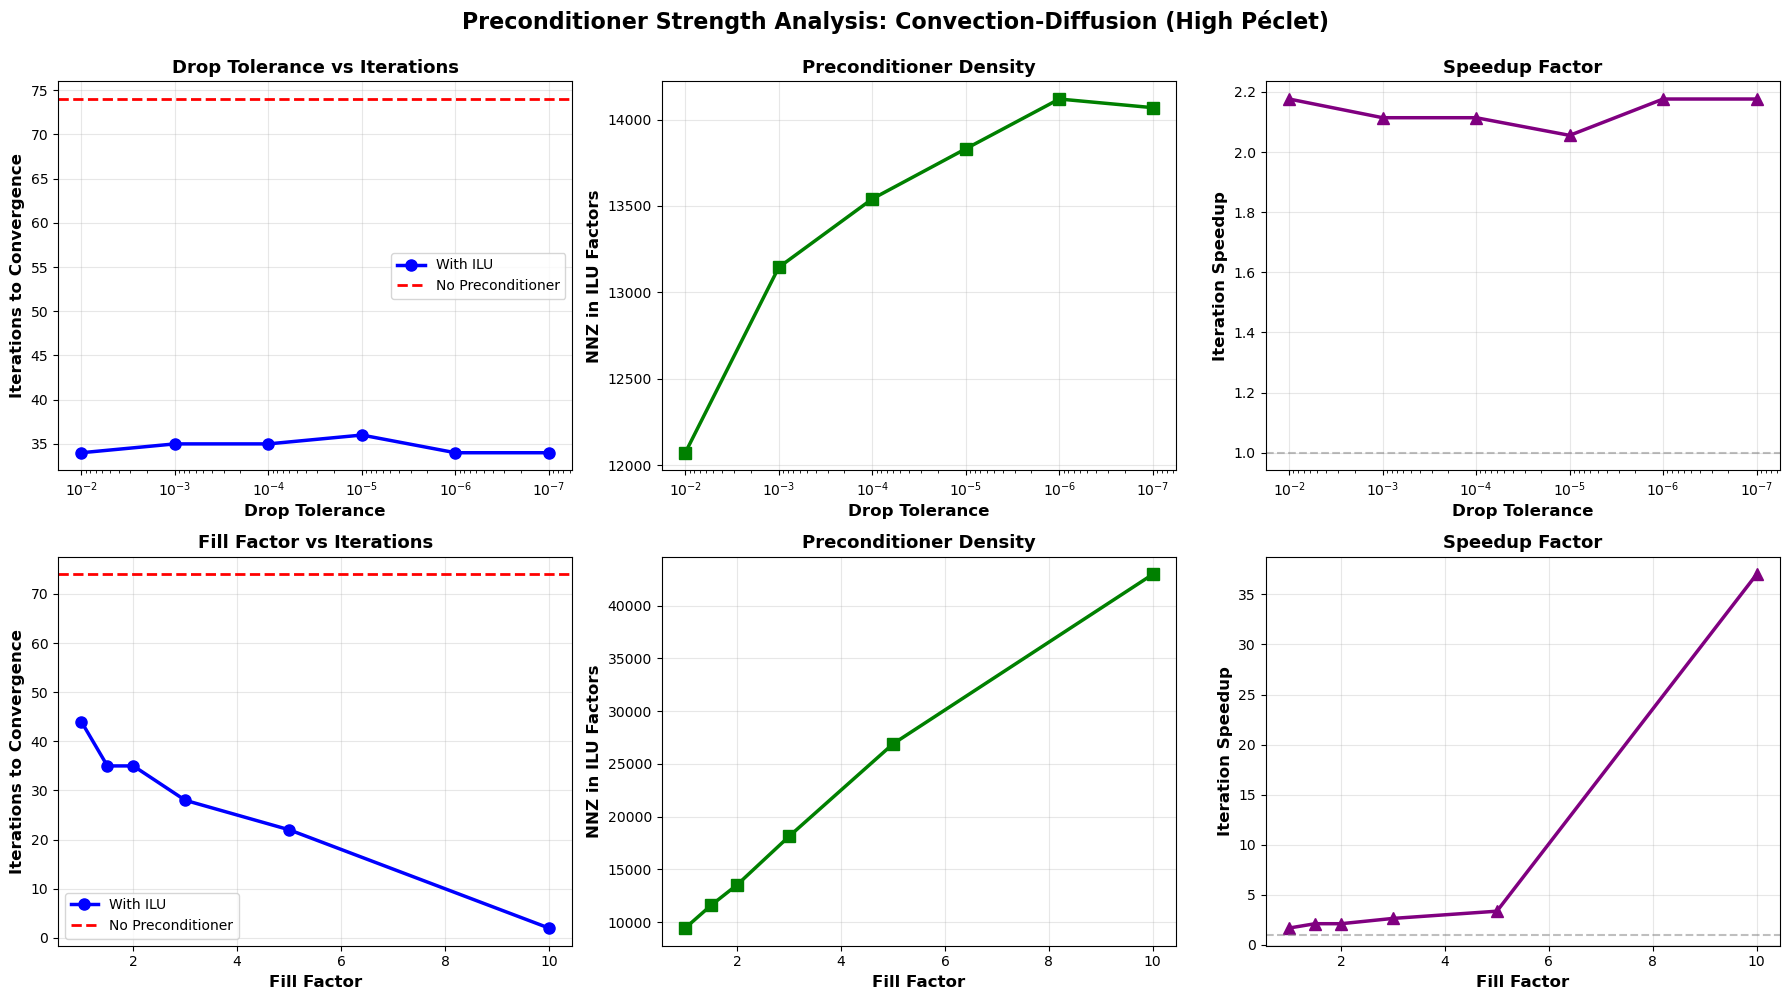


COST-BENEFIT ANALYSIS

Drop Tolerance Sweep:
Drop Tol     Setup(s)   Solve(s)   Total(s)   Speedup   
--------------------------------------------------------------------------------
1e-02        0.0028     0.0156     0.0184     0.25      ×
1e-03        0.0028     0.0157     0.0186     0.25      ×
1e-04        0.0027     0.0156     0.0183     0.25      ×
1e-05        0.0028     0.0156     0.0184     0.25      ×
1e-06        0.0028     0.0150     0.0177     0.26      ×
1e-07        0.0035     0.0152     0.0188     0.24      ×

Baseline (no precond): 0.0046s total

Fill Factor Sweep:
Fill         Setup(s)   Solve(s)   Total(s)   Speedup   
--------------------------------------------------------------------------------
1.0          0.0030     0.0186     0.0216     0.21      ×
1.5          0.0027     0.0155     0.0183     0.25      ×
2.0          0.0029     0.0166     0.0195     0.23      ×
3.0          0.0034     0.0145     0.0180     0.25      ×
5.0          0.0041     0.0125     0.016

In [9]:
from preconditioner_study import run_preconditioner_study

# Use convection-diffusion problem (benefits most from preconditioning)
nx = ny = 40
A_cd = convection_diffusion_2d(nx, ny, diffusion=0.01, vel=(2.0, 1.0))
N_cd = A_cd.shape[0]
x_true_cd = np.ones(N_cd)
b_cd = A_cd.dot(x_true_cd)

# Run complete study
results_drop, results_fill = run_preconditioner_study(
    A_cd, b_cd, x_true_cd, 
    problem_name="Convection-Diffusion (High Péclet)")

# Test 6- Peclet number sweep


████████████████████████████████████████████████████████████████████████████████
PÉCLET NUMBER STUDY
████████████████████████████████████████████████████████████████████████████████

PÉCLET NUMBER SWEEP
Grid: 40×40 (1600 unknowns)
Grid spacing h = 0.0244
Diffusion ε = 0.01
Preconditioning: None
Target Péclet numbers: [0.1, 0.5, 1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]

Pe       Velocity     BiCGSTAB     BiCG         CGS          GMRES       
--------------------------------------------------------------------------------
0.1      0.041        87           136          99           280         
0.5      0.205        80           139          79           200         
1.0      0.410        78           131          80           260         
2.0      0.820        79           124          262          260         
5.0      2.050        82           279          FAIL         280         
10.0     4.100        83           FAIL         FAIL         280         
25.0     10.250       94   

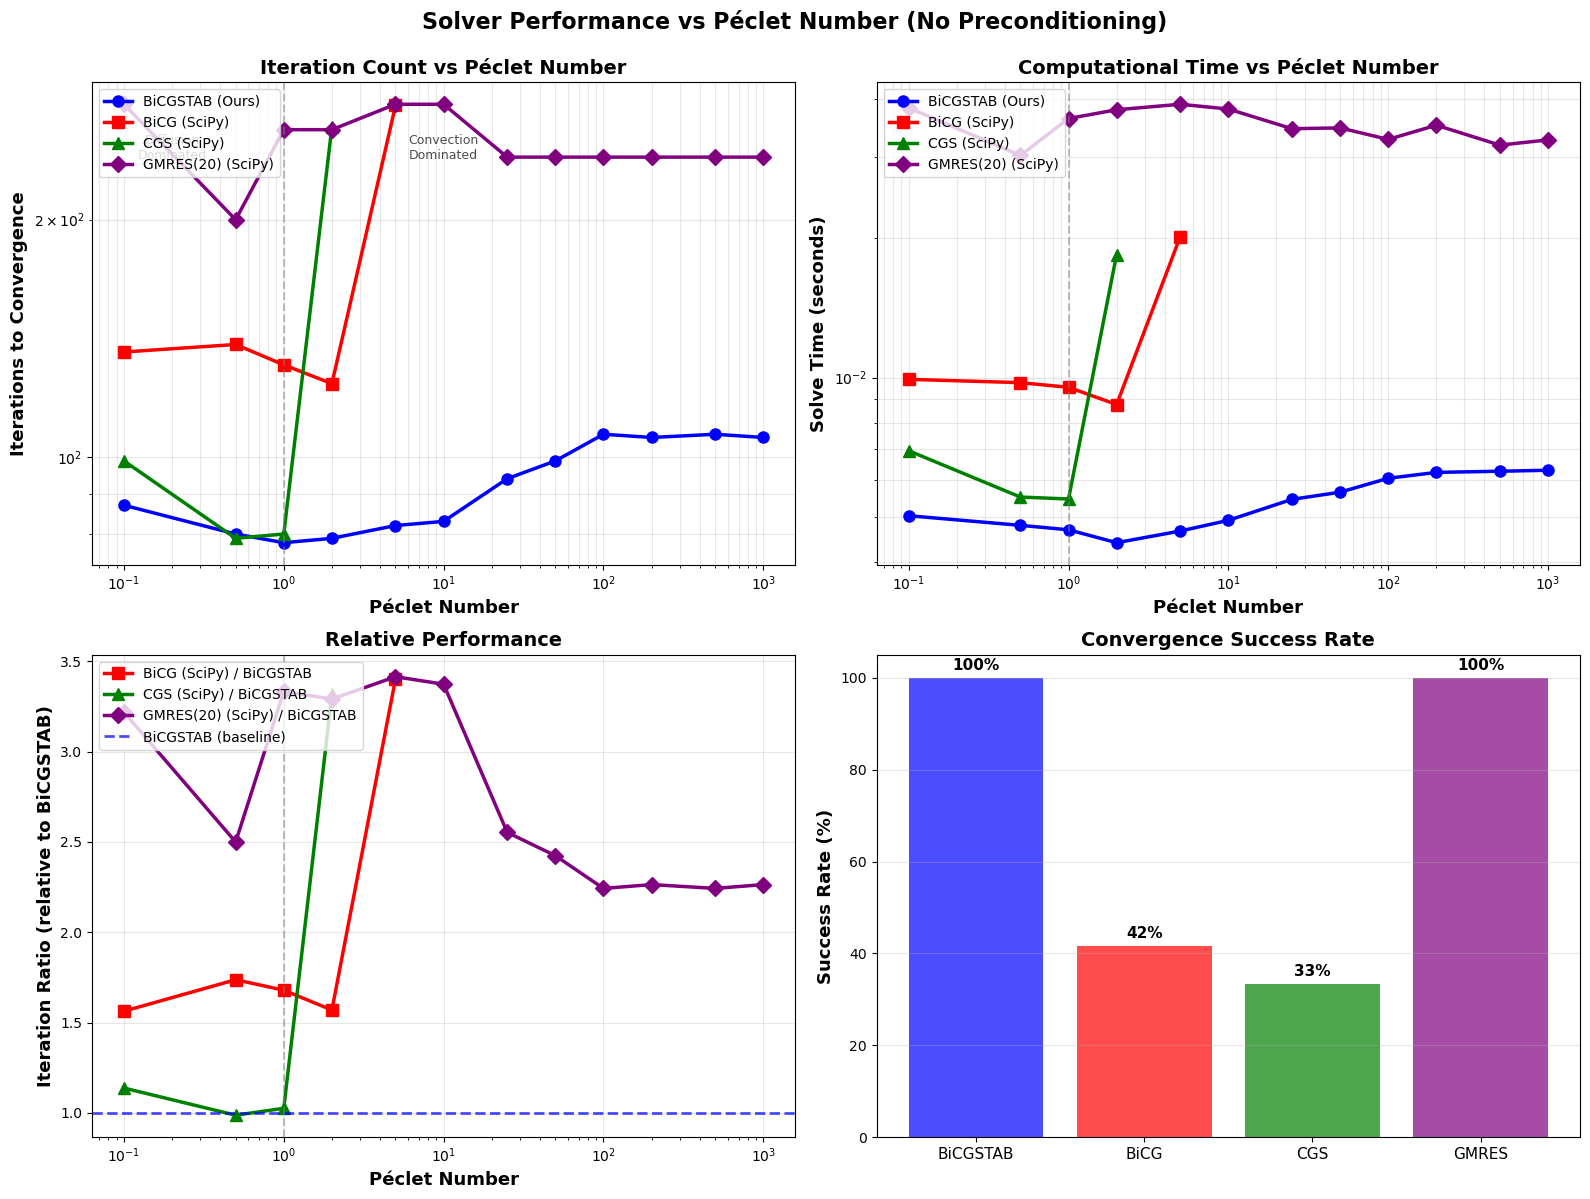


PÉCLET REGIME ANALYSIS

Diffusion-dominated (Pe < 1):
----------------------------------------------------------------------
  Péclet numbers tested: [np.float64(0.09999999999999998), np.float64(0.5)]

  Solver                    Avg Iters    Success Rate   
  ----------------------------------------------------
  BiCGSTAB (Ours)           83.5         100           %
  BiCG (SciPy)              137.5        100           %
  CGS (SciPy)               89.0         100           %
  GMRES(20) (SciPy)         240.0        100           %

Balanced (1 ≤ Pe < 10):
----------------------------------------------------------------------
  Péclet numbers tested: [np.float64(1.0), np.float64(2.0), np.float64(4.999999999999999), np.float64(9.999999999999998)]

  Solver                    Avg Iters    Success Rate   
  ----------------------------------------------------
  BiCGSTAB (Ours)           80.5         100           %
  BiCG (SciPy)              178.0        75            %
  CGS (SciPy

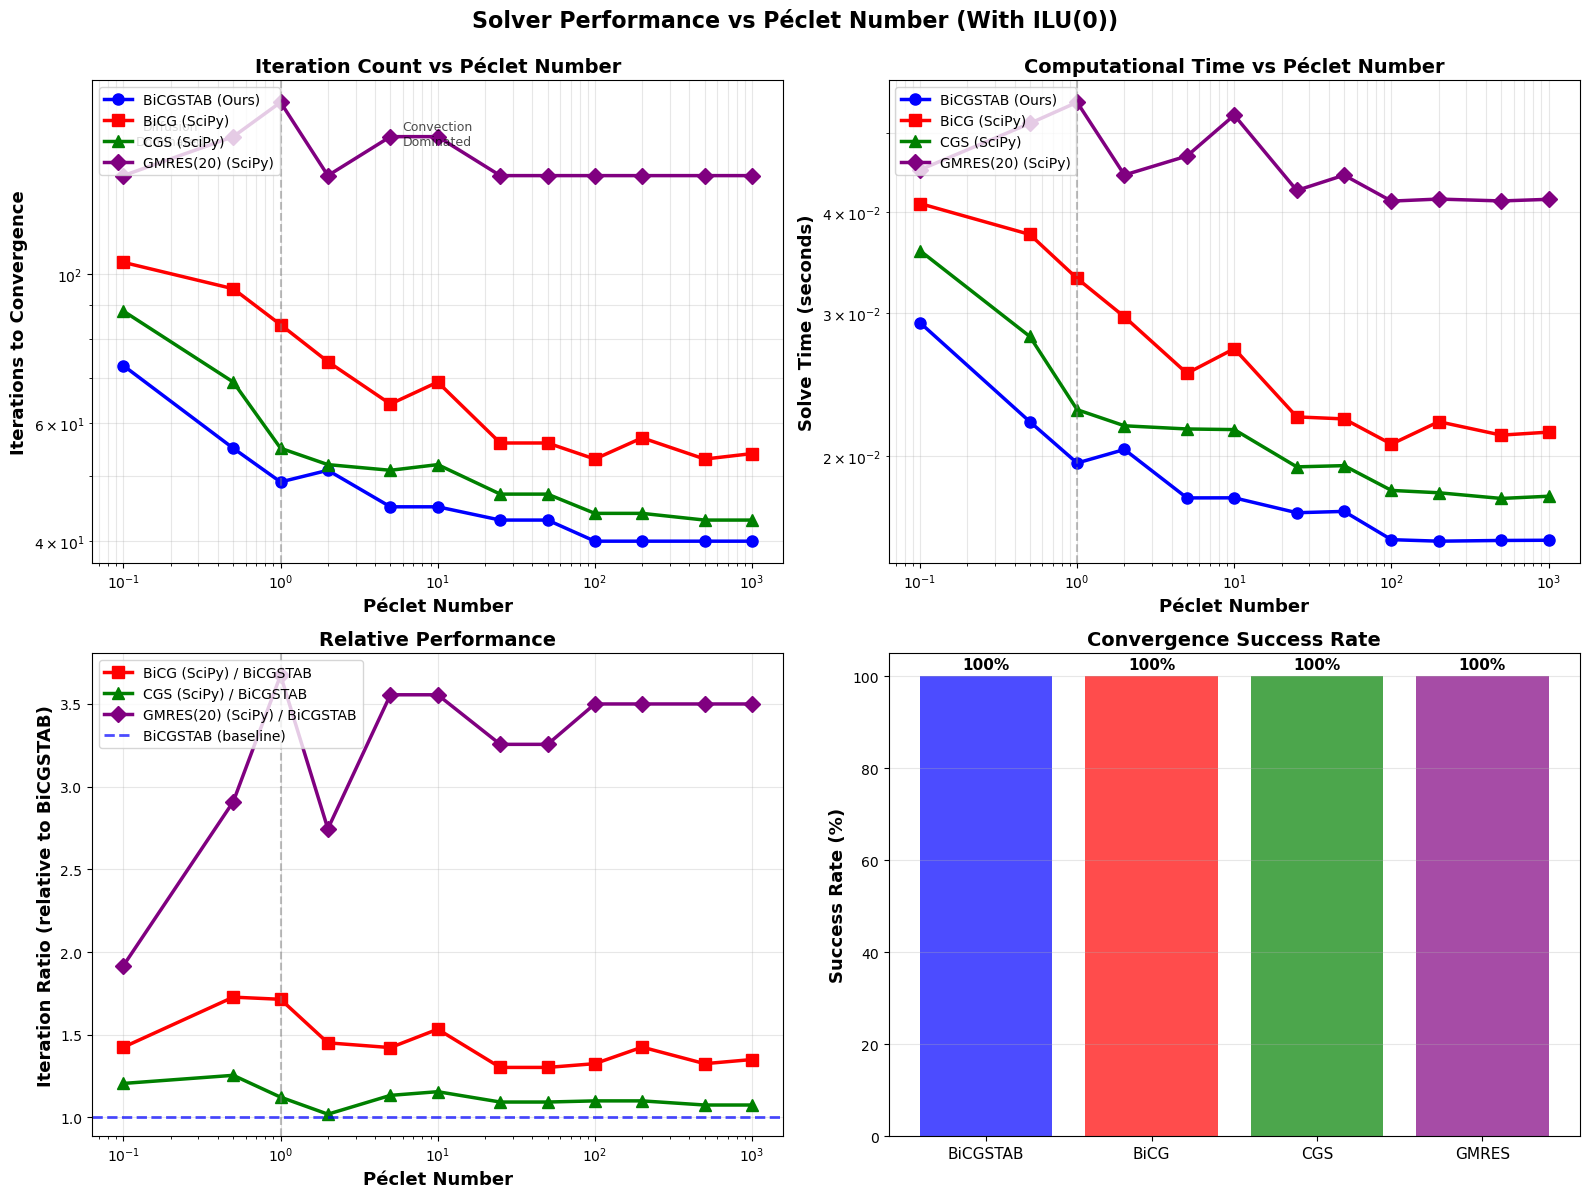

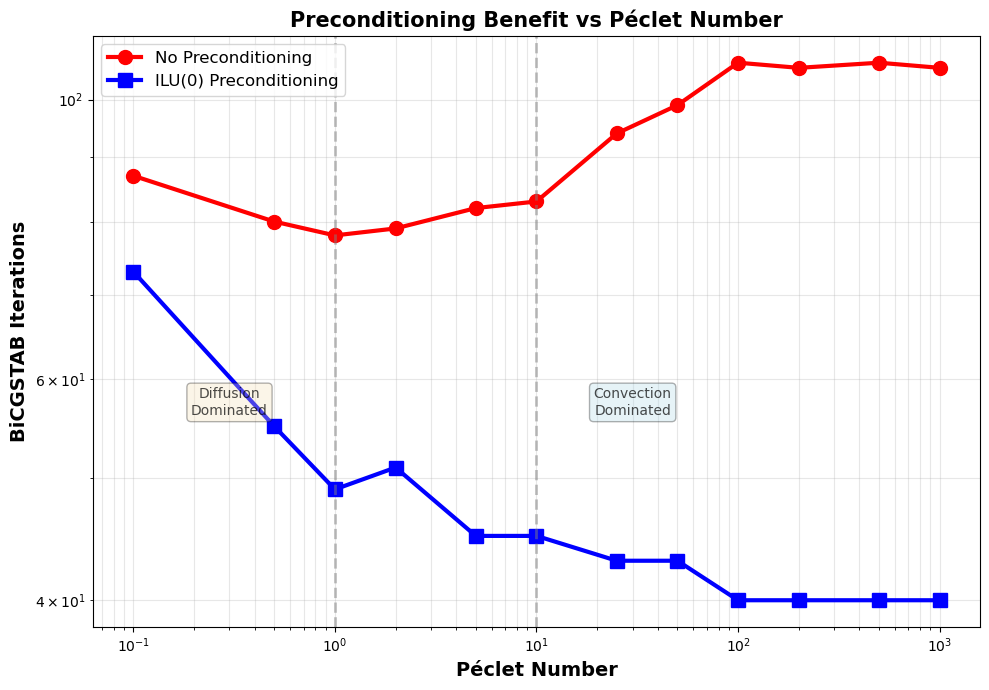


PRECONDITIONING SPEEDUP BY PÉCLET NUMBER
Péclet       No Precond      With ILU        Speedup     
--------------------------------------------------------------------------------
0.1          87              73              1.19        ×
0.5          80              55              1.45        ×
1.0          78              49              1.59        ×
2.0          79              51              1.55        ×
5.0          82              45              1.82        ×
10.0         83              45              1.84        ×
25.0         94              43              2.19        ×
50.0         99              43              2.30        ×
100.0        107             40              2.67        ×
200.0        106             40              2.65        ×
500.0        107             40              2.67        ×
1000.0       106             40              2.65        ×


In [ ]:
# ============================================================================
# CELL: PÉCLET NUMBER SWEEP
# ============================================================================

from peclet_study import (sweep_peclet_numbers, plot_peclet_sweep,
                          analyze_peclet_regimes, compare_with_without_precond)

print("\n" + "█"*80)
print("PÉCLET NUMBER STUDY")
print("█"*80)

# Define test range
peclet_targets = [0.1, 0.5, 1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]

# ============================================================================
# Part 1: Without Preconditioning
# ============================================================================

results_peclet_no_precond = sweep_peclet_numbers(
    nx=40, ny=40, 
    diffusion=0.01,
    peclet_targets=peclet_targets,
    use_precond=False
)

plot_peclet_sweep(results_peclet_no_precond, use_precond=False)
analyze_peclet_regimes(results_peclet_no_precond)

# ============================================================================
# Part 2: With Preconditioning
# ============================================================================

results_peclet_with_precond = sweep_peclet_numbers(
    nx=40, ny=40,
    diffusion=0.01,
    peclet_targets=peclet_targets,
    use_precond=True
)

plot_peclet_sweep(results_peclet_with_precond, use_precond=True)

# ============================================================================
# Part 3: Direct Comparison
# ============================================================================

# Focus on BiCGSTAB for cleaner comparison
fig, ax = plt.subplots(figsize=(10, 7))

pe_no = results_peclet_no_precond['peclet_numbers']
iters_no = results_peclet_no_precond['BiCGSTAB (Ours)']['iterations']
conv_no = results_peclet_no_precond['BiCGSTAB (Ours)']['converged']

pe_with = results_peclet_with_precond['peclet_numbers']
iters_with = results_peclet_with_precond['BiCGSTAB (Ours)']['iterations']
conv_with = results_peclet_with_precond['BiCGSTAB (Ours)']['converged']

# Plot only converged points
pe_no_conv = [pe for pe, conv in zip(pe_no, conv_no) if conv]
it_no_conv = [it for it, conv in zip(iters_no, conv_no) if conv]

pe_with_conv = [pe for pe, conv in zip(pe_with, conv_with) if conv]
it_with_conv = [it for it, conv in zip(iters_with, conv_with) if conv]

ax.loglog(pe_no_conv, it_no_conv, 'o-', linewidth=3, markersize=10,
         color='red', label='No Preconditioning')
ax.loglog(pe_with_conv, it_with_conv, 's-', linewidth=3, markersize=10,
         color='blue', label='ILU(0) Preconditioning')

ax.set_xlabel('Péclet Number', fontsize=14, fontweight='bold')
ax.set_ylabel('BiCGSTAB Iterations', fontsize=14, fontweight='bold')
ax.set_title('Preconditioning Benefit vs Péclet Number', 
            fontsize=15, fontweight='bold')
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3, which='both')

# Add regime boundaries
ax.axvline(1, color='gray', linestyle='--', alpha=0.5, linewidth=2)
ax.axvline(10, color='gray', linestyle='--', alpha=0.5, linewidth=2)
ax.text(0.3, ax.get_ylim()[1]*0.5, 'Diffusion\nDominated', 
       fontsize=10, ha='center', alpha=0.7, bbox=dict(boxstyle='round', 
       facecolor='wheat', alpha=0.3))
ax.text(30, ax.get_ylim()[1]*0.5, 'Convection\nDominated', 
       fontsize=10, ha='center', alpha=0.7, bbox=dict(boxstyle='round',
       facecolor='lightblue', alpha=0.3))

plt.tight_layout()
plt.show()

# Print speedup summary
print("\n" + "="*80)
print("PRECONDITIONING SPEEDUP BY PÉCLET NUMBER")
print("="*80)
print(f"{'Péclet':<12} {'No Precond':<15} {'With ILU':<15} {'Speedup':<12}")
print("-"*80)

for i, pe in enumerate(pe_no):
    if conv_no[i] and conv_with[i]:
        it_no = iters_no[i]
        it_with = iters_with[i]
        speedup = it_no / it_with
        print(f"{pe:<12.1f} {it_no:<15} {it_with:<15} {speedup:<12.2f}×")

print("="*80)

### Machine precision study


████████████████████████████████████████████████████████████████████████████████
MACHINE PRECISION STUDY
████████████████████████████████████████████████████████████████████████████████

MACHINE PRECISION SWEEP: Poisson 30×30
Problem size: 900 unknowns
Testing precisions: ['float64', 'float32', 'float16']

Precision    Bits     ε_machine       Converged    Iters    Error        Reason              
-----------------------------------------------------------------------------------------------
float64      64       2.22e-16        ✓ Yes        39       6.897e-05    converged_s         
float32      32       1.19e-07        ✓ Yes        39       3.617e-04    converged_s         
float16      16       9.77e-04        ✗ CRASH      -        -            Exception           

MACHINE PRECISION SWEEP: Conv-Diff Pe≈10
Problem size: 1600 unknowns
Testing precisions: ['float64', 'float32', 'float16']

Precision    Bits     ε_machine       Converged    Iters    Error        Reason              


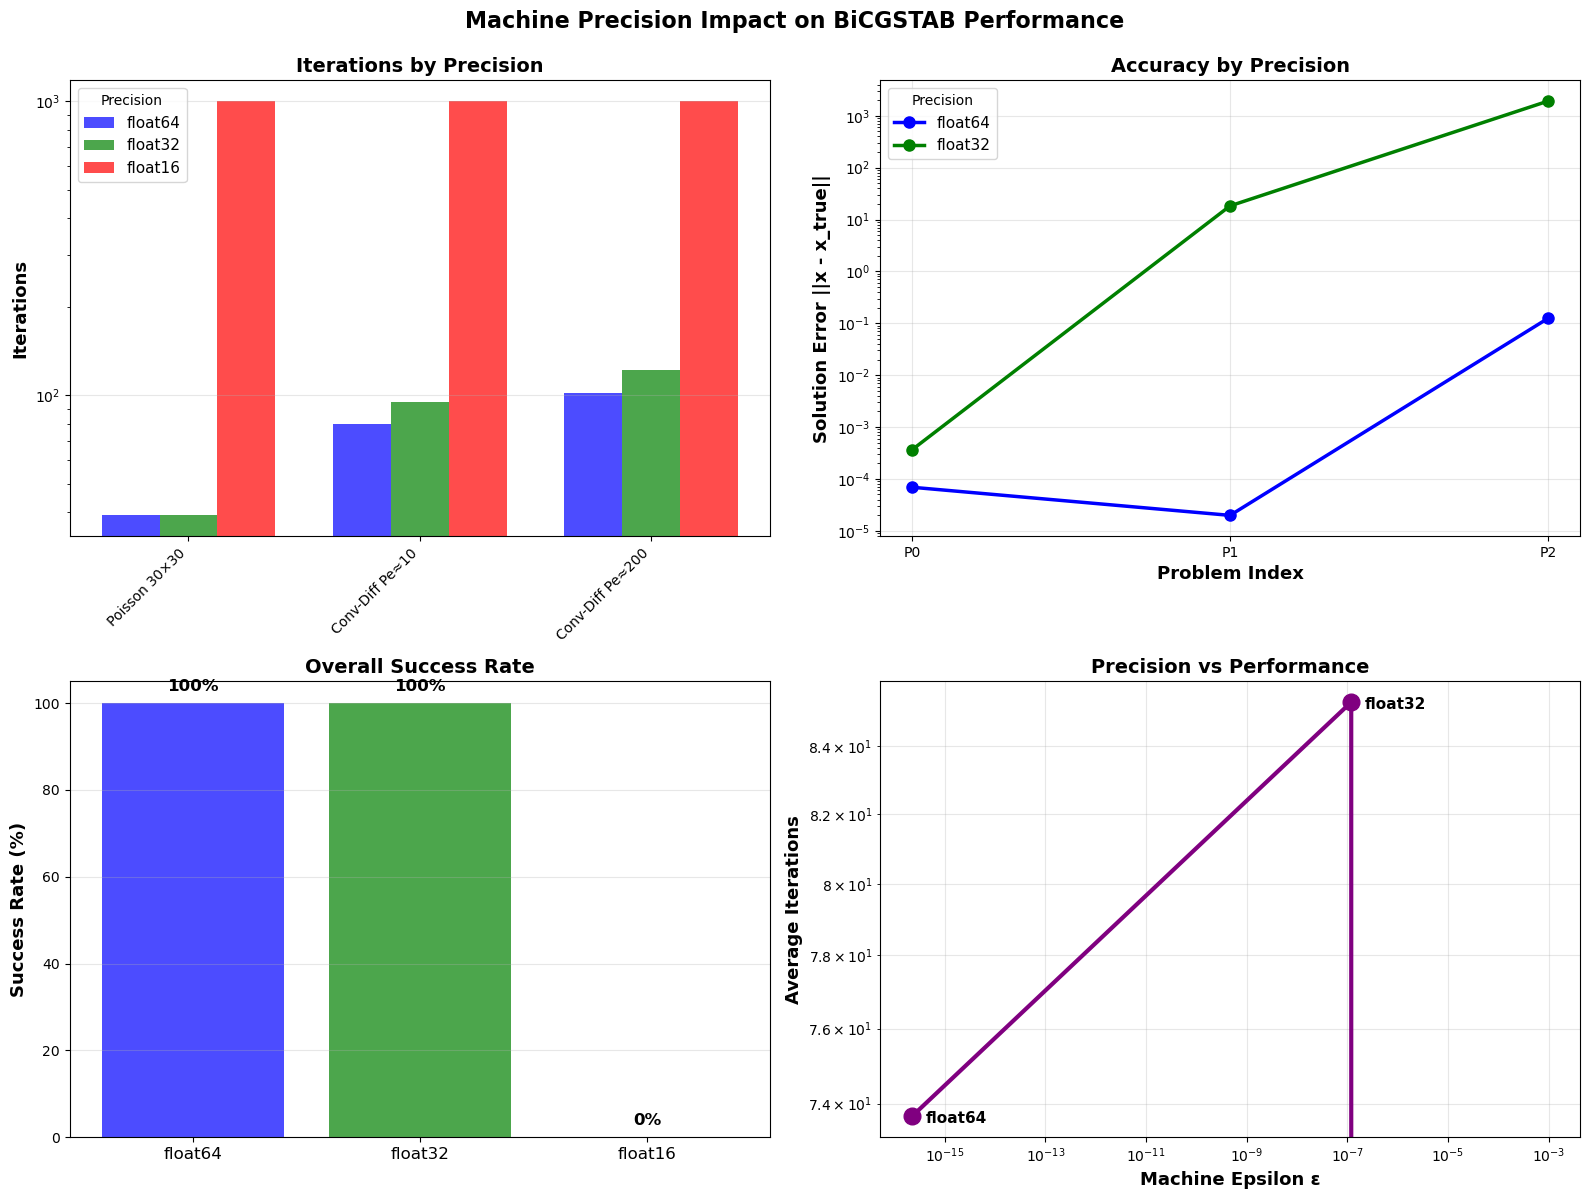


PRECISION REQUIREMENTS ANALYSIS

Problem                        float16         float32         float64        
---------------------------------------------------------------------------
Poisson 30×30                  ✗ FAIL          ✓ OK            ✓ OK           
Conv-Diff Pe≈10                ✗ FAIL          ✓ OK            ✓ OK           
Conv-Diff Pe≈200               ✗ FAIL          ✓ OK            ✓ OK           

KEY INSIGHTS:

    1. PRECISION REQUIREMENTS:
       - float64 (64-bit): Standard for scientific computing
         • Machine epsilon ≈ 2.2e-16
         • ~16 decimal digits of precision
         • Recommended for production use
       
       - float32 (32-bit): Acceptable for many problems
         • Machine epsilon ≈ 1.2e-7
         • ~7 decimal digits of precision
         • Works for well-conditioned problems
         • May hit breakdown on ill-conditioned systems
       
       - float16 (16-bit): Insufficient for iterative solvers
         • Machine epsilon ≈ 

In [ ]:
# ============================================================================
# CELL: MACHINE PRECISION STUDY
# ============================================================================

from precision_study import (test_precision_levels,
                             test_precision_with_perturbations,
                             test_breakdown_susceptibility_by_precision,
                             plot_precision_comparison,
                             plot_noise_sensitivity,
                             plot_breakdown_by_precision,
                             analyze_precision_requirements)

print("\n" + "█"*80)
print("MACHINE PRECISION STUDY")
print("█"*80)

# ============================================================================
# Part 1: Test Multiple Problems at Different Precisions
# ============================================================================

problems_for_precision = []
problem_names_precision = []

# Problem 1: Well-conditioned Poisson
nx = ny = 30
A_poisson = poisson_2d(nx, ny)
N_poisson = A_poisson.shape[0]
x_true_poisson = np.ones(N_poisson)
b_poisson = A_poisson.dot(x_true_poisson)

problems_for_precision.append((A_poisson, b_poisson, x_true_poisson))
problem_names_precision.append('Poisson 30×30')

# Problem 2: Moderate Péclet Conv-Diff
nx = ny = 40
h = 1.0 / (nx + 1)
diffusion = 0.01
vel_mag = 10 * diffusion / h  # Pe ≈ 10
vel = (vel_mag / np.sqrt(2), vel_mag / np.sqrt(2))

A_cd_mod = convection_diffusion_2d(nx, ny, diffusion=diffusion, vel=vel)
N_cd_mod = A_cd_mod.shape[0]
x_true_cd_mod = np.ones(N_cd_mod)
b_cd_mod = A_cd_mod.dot(x_true_cd_mod)

problems_for_precision.append((A_cd_mod, b_cd_mod, x_true_cd_mod))
problem_names_precision.append('Conv-Diff Pe≈10')

# Problem 3: High Péclet Conv-Diff
vel_mag = 200 * diffusion / h  # Pe ≈ 200
vel = (vel_mag / np.sqrt(2), vel_mag / np.sqrt(2))

A_cd_high = convection_diffusion_2d(nx, ny, diffusion=diffusion, vel=vel)
N_cd_high = A_cd_high.shape[0]
x_true_cd_high = np.ones(N_cd_high)
b_cd_high = A_cd_high.dot(x_true_cd_high)

problems_for_precision.append((A_cd_high, b_cd_high, x_true_cd_high))
problem_names_precision.append('Conv-Diff Pe≈200')

# Run precision tests on all problems
results_precision_list = []

for (A, b, x_true), name in zip(problems_for_precision, problem_names_precision):
    results = test_precision_levels(A, b, x_true, name)
    results_precision_list.append(results)

# Plot comparison
plot_precision_comparison(results_precision_list, problem_names_precision)

# Analyze requirements
analyze_precision_requirements(results_precision_list, problem_names_precision)

# FLOPS study


████████████████████████████████████████████████████████████████████████████████
COMPUTATIONAL WORK (FLOPs) STUDY
████████████████████████████████████████████████████████████████████████████████

████████████████████████████████████████████████████████████████████████████████
DETAILED FLOP ANALYSIS: Convection-Diffusion High Péclet
████████████████████████████████████████████████████████████████████████████████

COMPUTATIONAL WORK COMPARISON (FLOPs)
Problem size: n = 1600, nnz = 7840
SpMV cost: 15,680 FLOPs

Solver                    Iterations   Total FLOPs        FLOPs/Iter      SpMV Count  
------------------------------------------------------------------------------------------
BiCGSTAB (Ours)           74           3,315,200          44,800          148         
BiCG (SciPy)              125          7,120,000          56,960          250         
CGS (SciPy)               416          26,357,760         63,360          832         
GMRES(20) (SciPy)         280          22,310,

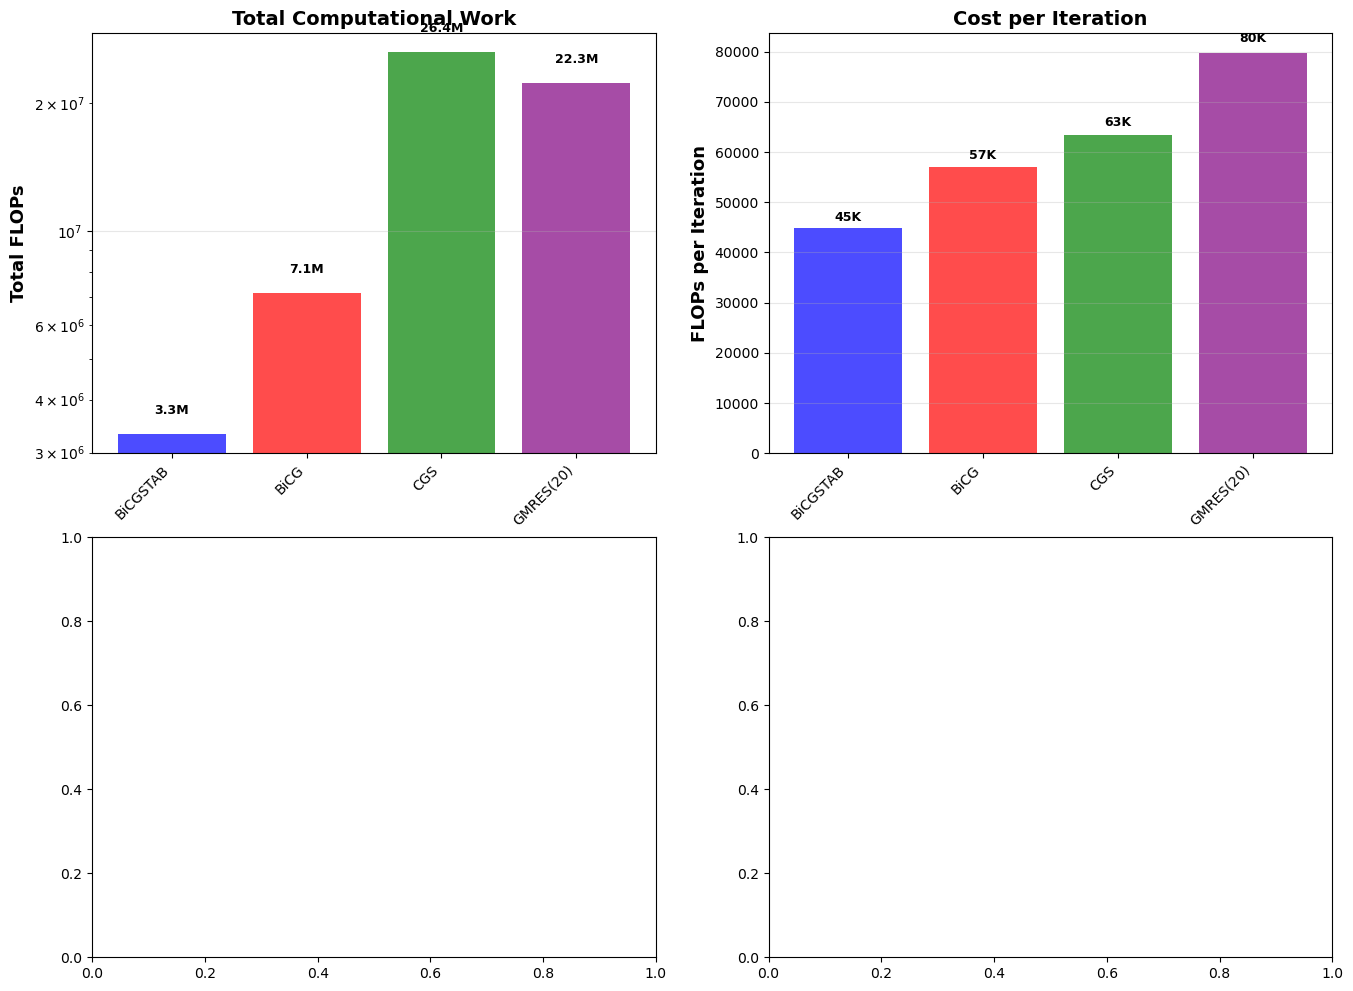

In [ ]:

# ============================================================================
# CELL: COMPUTATIONAL WORK (FLOPs) ANALYSIS
# ============================================================================

from flops_study import (detailed_flop_analysis,
                        analyze_flop_efficiency,
                        compare_memory_vs_flops)

print("\n" + "█"*80)
print("COMPUTATIONAL WORK (FLOPs) STUDY")
print("█"*80)

# Use the high Péclet convection-diffusion problem
# (Already defined from earlier cells)

# ============================================================================
# Part 1: Detailed FLOP Analysis
# ============================================================================

work_analysis = detailed_flop_analysis(
    results_cd_high,
    A_cd_high,
    "Convection-Diffusion High Péclet"
)


# Prepare for Summary 

In [ ]:
import pickle

print("\n" + "█"*80)
print("SAVING RESULTS")
print("█"*80)

results_to_save = {
    'results_poisson': results_poisson,
    'results_cd_high': results_cd_high,
    'results_with_precond': results_with_precond,
    'A_cd_high': A_cd_high,
    'bicgstab_no': bicgstab_no,
    'bicgstab_ilu': bicgstab_ilu,
    'speedup': speedup
}

with open('bicgstab_results.pkl', 'wb') as f:
    pickle.dump(results_to_save, f)

print("✅ Results saved to bicgstab_results.pkl")
print("   You can now open summary.ipynb to generate tables and conclusions")



████████████████████████████████████████████████████████████████████████████████
SAVING RESULTS
████████████████████████████████████████████████████████████████████████████████
✅ Results saved to bicgstab_results.pkl
   You can now open summary.ipynb to generate tables and conclusions


: 

: 

: 

: 

: 